In [1]:
import cv2
from google.colab.patches import cv2_imshow
from math import ceil
import numpy as np

#Filtro da média

In [6]:
def filtro_media(imagem, n):
  inv_n = 1/(n**2)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]]).astype(int)
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      for x in range(i, i + n):
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          soma = soma + imagem[x][y]
      media = soma*inv_n
      x_y = ceil(n/2) - 2
      nova_imagem[x - x_y][y - x_y] = media
  return nova_imagem

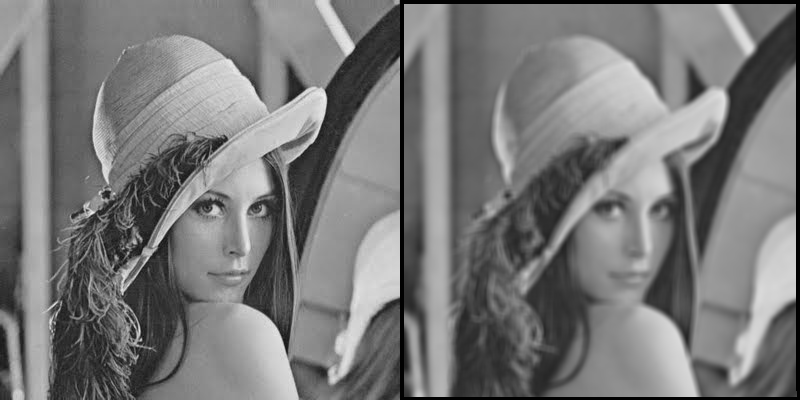

In [7]:
imagem = cv2.imread('lena.jpg', 0)
nova_imagem = filtro_media(imagem, 7)
imagens = np.hstack((imagem, nova_imagem))
cv2_imshow(imagens)

#Filtro da mediana

In [ ]:
def filtro_mediana(imagem, n):
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]]).astype(int)
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      if (i + n >= len(imagem)):
        break
      pixels = []
      for x in range(i, i + n):
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          pixels.append(imagem[x][y])
      pixels.sort()
      x_y = ceil(n/2) - 2
      if (len(pixels) != 0):
        nova_imagem[x - x_y][y - x_y] = pixels[ceil(len(pixels)/2) - 1]
  return nova_imagem

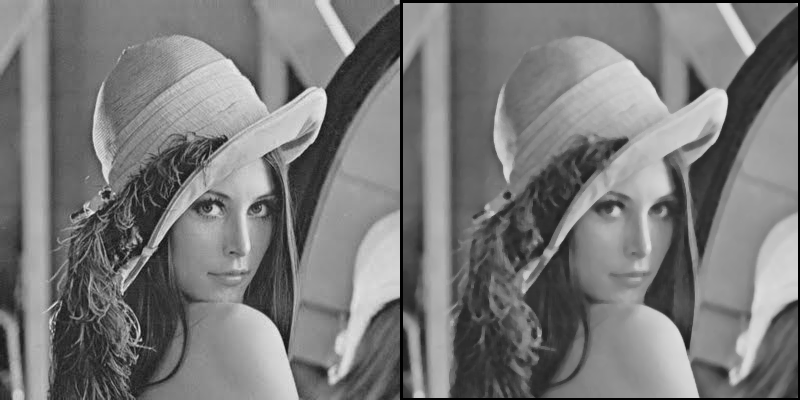

In [ ]:
imagem = cv2.imread('lena.jpg', 0)
nova_imagem = filtro_mediana(imagem, 5)
imagens = np.hstack((imagem, nova_imagem))
cv2_imshow(imagens)

#Filtro gaussiano

In [ ]:
kernel_gaussiano = [[0.077847, 0.123317, 0.077847], [0.123317, 0.195346, 0.123317], [0.077847, 0.123317, 0.077847]]

In [ ]:
def aplica_filtro(imagem, kernel):
  n = len(kernel)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      matriz_img = []
      for x in range(i, i + n):
        linha = []
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          linha.append(imagem[x][y])
        matriz_img.append(linha)
      if len(matriz_img) > 0:
        for k in range(len(kernel)):
          for l in range(len(kernel[k])):
            soma = soma + kernel[k][l]*matriz_img[k][l]
        x_y = ceil(n/2) - 2
        nova_imagem[x - x_y][y - x_y] = soma
  return nova_imagem

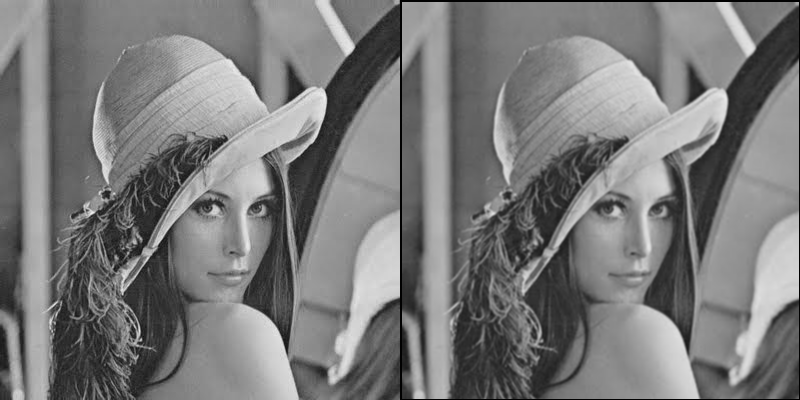

In [ ]:
imagem = cv2.imread('lena.jpg', 0)
nova_imagem = aplica_filtro(imagem, kernel_gaussiano)
imagens = np.hstack((imagem, nova_imagem))
cv2_imshow(imagens)

#Filtro de Sobel

In [ ]:
kernel_horizontal = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
kernel_vertical = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

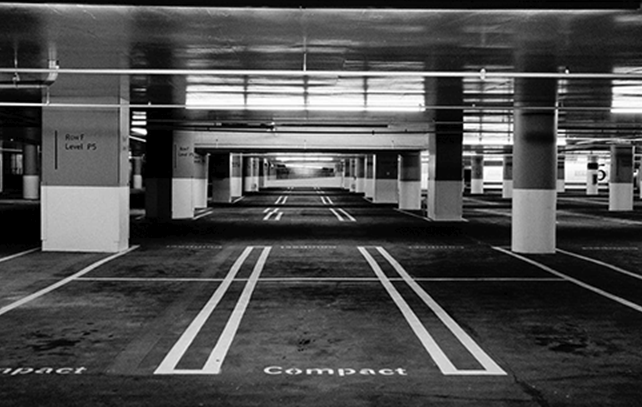

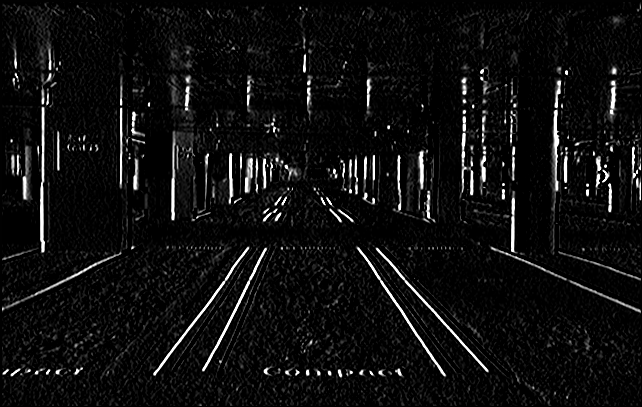

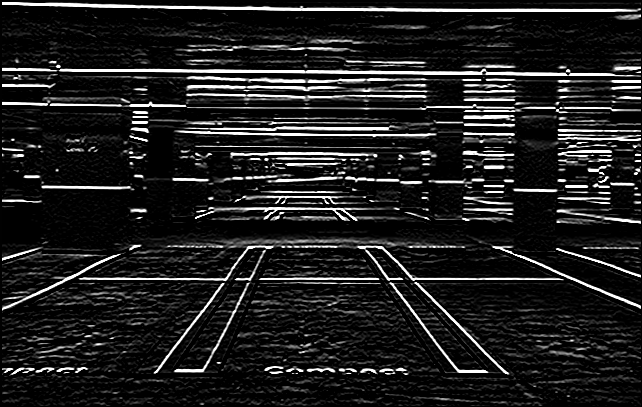

In [ ]:
imagem = cv2.imread('borderParking.png', 0)
filtro_vertical = aplica_filtro(imagem, kernel_vertical)
filtro_horizontal = aplica_filtro(imagem, kernel_horizontal)
cv2_imshow(imagem)
cv2_imshow(filtro_vertical)
cv2_imshow(filtro_horizontal)

#Filtro de Roberts

In [ ]:
kernel_horizontal = [[1, 0], [0, -1]]
kernel_vertical = [[0, 1], [-1, 0]]

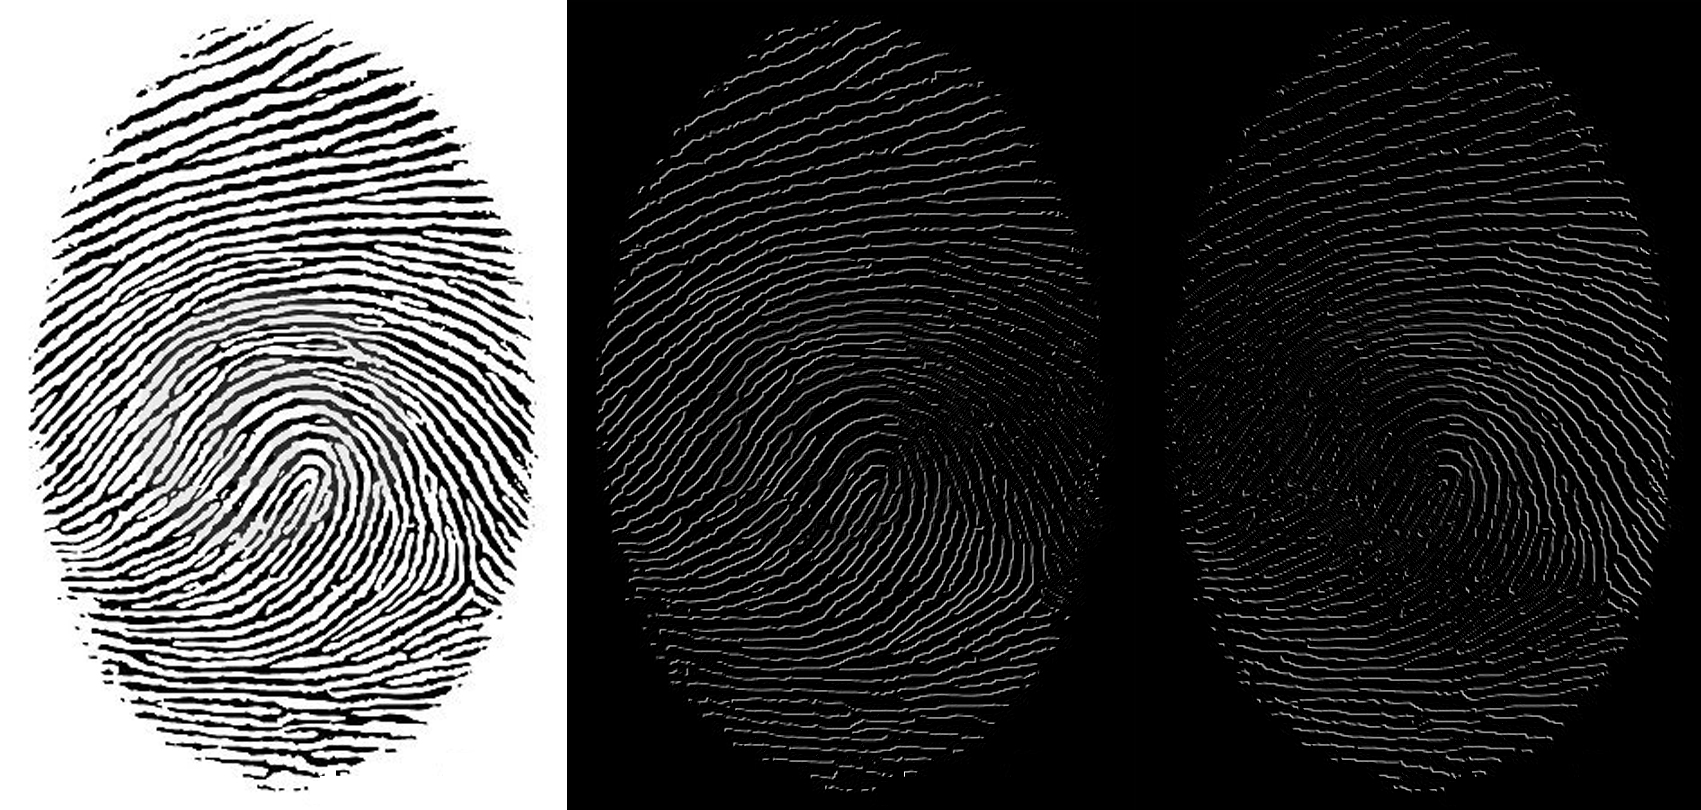

In [ ]:
imagem = cv2.imread('borderFingerprint.png', 0)
filtro_vertical = aplica_filtro(imagem, kernel_horizontal)
filtro_horizontal = aplica_filtro(imagem, kernel_vertical)
imagens = np.hstack((imagem, filtro_vertical, filtro_horizontal))
cv2_imshow(imagens)

#Filtro de Prewitt

In [ ]:
kernel_horizontal = [[-1, -1, -1],[0, 0, 0],[1, 1, 1]]
kernel_vertical = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]

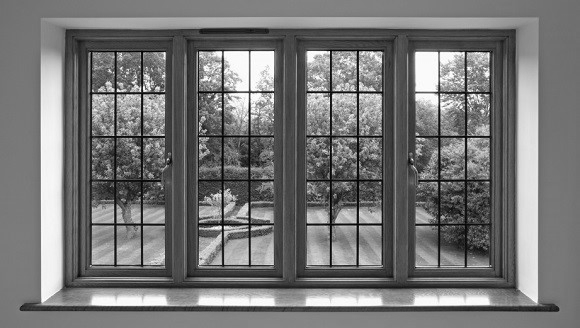

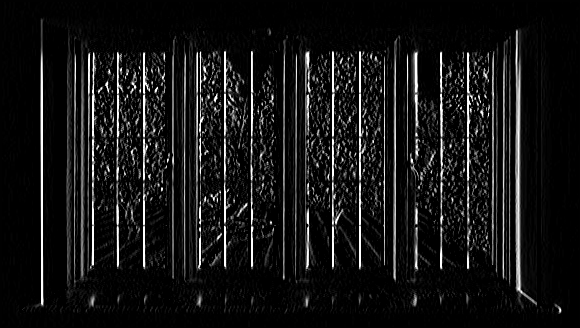

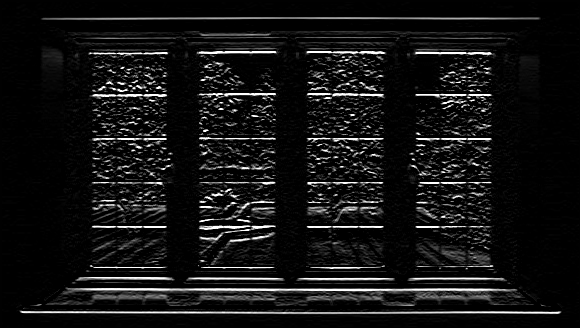

In [ ]:
imagem = cv2.imread('borderWindow.png', 0)
filtro_vertical = aplica_filtro(imagem, kernel_vertical)
filtro_horizontal = aplica_filtro(imagem, kernel_horizontal)
cv2_imshow(imagem)
cv2_imshow(filtro_vertical)
cv2_imshow(filtro_horizontal)